## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
raw_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
raw_data.shape

(1893, 8)

In [33]:
raw_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
mice_number = raw_data["Mouse ID"].count()
mice_number

1893

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = raw_data[raw_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_g989 = raw_data.loc[raw_data["Mouse ID"] == "g989", :]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = raw_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_data["Mouse ID"].count()
mice_count

1888

## Summary Statistics

In [39]:
#what are the drug names
clean_data["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [40]:
#pull out only 2 columns out of dataframe for comparing
data_df = clean_data.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
data_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_stats = data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" :["mean", "median", "var", "std", "sem"]})

drug_stats.head(20)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_df = clean_data[["Drug Regimen","Tumor Volume (mm3)"]]

tumor_group = tumor_df.groupby(["Drug Regimen"])

tumor_mean = tumor_group["Tumor Volume (mm3)"].mean()
tumor_median = tumor_group["Tumor Volume (mm3)"].median()
tumor_variance = tumor_group["Tumor Volume (mm3)"].var()
tumor_std = tumor_group["Tumor Volume (mm3)"].std()
tumor_sem = tumor_group["Tumor Volume (mm3)"].sem()

drug_stats_df= pd.DataFrame({
    "Mean": tumor_mean, 
    "Median": tumor_median, 
    "Variance": tumor_variance, 
    "Standard Deviation": tumor_std, 
    "SEM": tumor_sem
})

drug_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [43]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
group_data = clean_data.groupby("Drug Regimen")
count_drugs = group_data["Drug Regimen"].count()
count_drugs

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

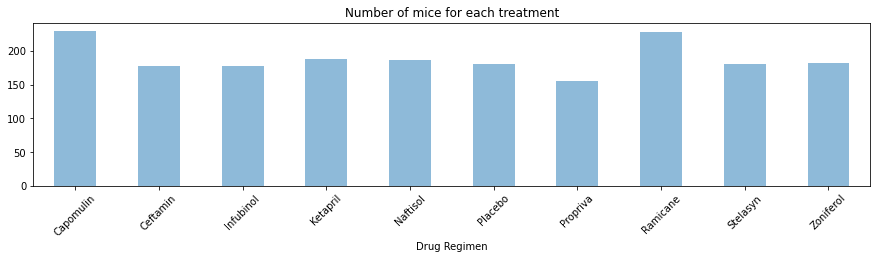

In [44]:
plt.figure(figsize=(15,3))

drugs_chart = count_drugs.plot(kind="bar", alpha=0.5)

plt.title("Number of mice for each treatment")
plt.xlabel("Drug Regimen")

plt.xticks(rotation=45)

plt.show

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_list = drug_stats_df.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [46]:
drug_count = (clean_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

<function matplotlib.pyplot.show(*args, **kw)>

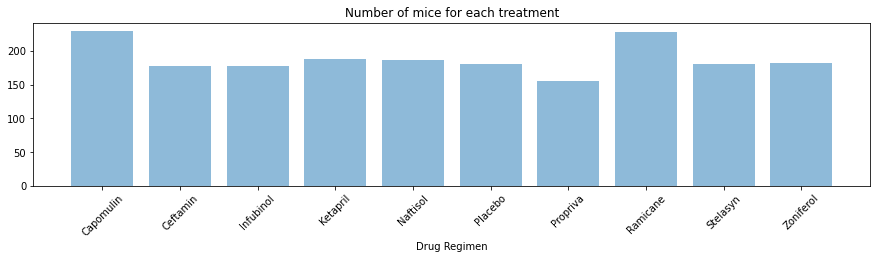

In [47]:
plt.figure(figsize=(15,3))
plt.bar(drug_list, drug_count, alpha=0.5,)


plt.title("Number of mice for each treatment")
plt.xlabel("Drug Regimen")

plt.xticks(rotation=45)

plt.show

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#group by gender
group_data = clean_data.groupby("Sex")

#gender count
gender_count = pd.DataFrame(group_data["Sex"].count())
print(gender_count)


        Sex
Sex        
Female  930
Male    958


<function matplotlib.pyplot.show(*args, **kw)>

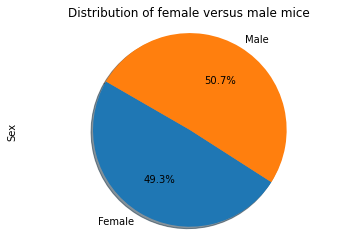

In [49]:
gender_count.plot(kind="pie", subplots=True, startangle=150, autopct='%1.1f%%', shadow=True, legend=False)
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_type = list(gender_count.index.values)
print(gender_type)


['Female', 'Male']


In [51]:
gender_totals = gender_count["Sex"]
print(gender_totals)

Sex
Female    930
Male      958
Name: Sex, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

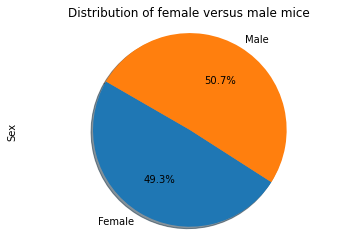

In [52]:
gender_count.plot(kind="pie", subplots=True, startangle=150, autopct='%1.1f%%', shadow=True, legend=False)
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show

## Quartiles, Outliers and Boxplots

In [53]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_df = clean_data[clean_data['Drug Regimen'].isin(drug_list)]

drug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
drug_df.shape

(814, 8)

In [58]:
# Start by getting the last (greatest) timepoint for each mouse
last_time = drug_df.groupby(['Drug Regimen','Mouse ID']).agg(Greatest_timepoint=("Timepoint",lambda x: x.nlargest(1)))
last_time

Greatest_timepoint
Drug Regimen Mouse ID                    
Capomulin    b128                      45
             b742                      45
             f966                      20
             g288                      45
             g316                      45
...                                   ...
Ramicane     s508                      45
             u196                      45
             w678                       5
             y449                      15
             z578                      45

[100 rows x 1 columns]

In [28]:
last_time.shape

(100, 1)

In [57]:
largest_tumor = drug_df.groupby(['Drug Regimen','Mouse ID']).agg(Largest_tumor=("Tumor Volume (mm3)",lambda x: x.iloc[-1]))
largest_tumor

Largest_tumor
Drug Regimen Mouse ID               
Capomulin    b128          38.982878
             b742          38.939633
             f966          30.485985
             g288          37.074024
             g316          40.159220
...                              ...
Ramicane     s508          30.276232
             u196          40.667713
             w678          43.166373
             y449          44.183451
             z578          30.638696

[100 rows x 1 columns]

In [69]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
group_data = last_time.add(largest_tumor, fill_value=0)
group_data.head()

Greatest_timepoint  Largest_tumor
Drug Regimen Mouse ID                                   
Capomulin    b128                    45.0      38.982878
             b742                    45.0      38.939633
             f966                    20.0      30.485985
             g288                    45.0      37.074024
             g316                    45.0      40.159220

In [80]:
final_data = largest_tumor.stack(level=0).unstack(level=0)
final_data

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Largest_tumor,NaN,NaN,67.973419,NaN
a251,Largest_tumor,NaN,NaN,65.525743,NaN
a275,Largest_tumor,NaN,62.999356,NaN,NaN
a411,Largest_tumor,NaN,NaN,NaN,38.407618
a444,Largest_tumor,NaN,NaN,NaN,43.047543
...,...,...,...,...,...
y769,Largest_tumor,NaN,68.594745,NaN,NaN
y793,Largest_tumor,31.896238,NaN,NaN,NaN
y865,Largest_tumor,NaN,64.729837,NaN,NaN


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    quartiles = final_data[drug].quantile([0.25, 0.5, 0.75]).round(2)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    median = quartiles[0.5]
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(list(final_data[drug].dropna()))  
    

Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.779999999999994
The the median of Capomulin is: 38.13 
Values below 20.71000000000001 for Capomulin could be outliers.
Values above 51.829999999999984 for Capomulin could be outliers.
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.099999999999998
The the median of Ramicane is: 36.56 
Values below 17.910000000000004 for Ramicane could be outliers.
Values above 54.309999999999995 for Ramicane could be outliers.
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.480000000000004
The the median of Infubinol is: 60.17 
Values below 36.82999999999999 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.
Ceftamin IQR dat

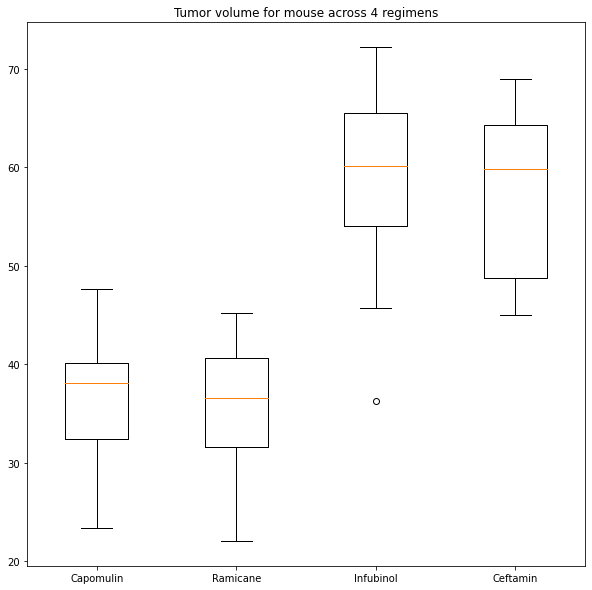

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(10,10))
ax.set_title("Tumor volume for mouse across 4 regimens")
ax.boxplot(tumor_vol)
plt.xticks([1,2,3,4], drug_list)
plt.show()

## Line and Scatter Plots

In [96]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [98]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [99]:
cap_mouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


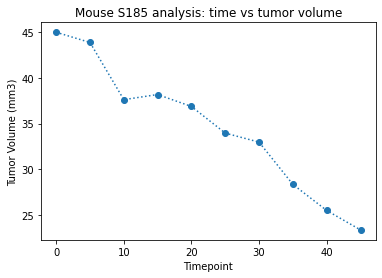

In [105]:
#plot time point versus tumor volume
x_axis = cap_mouse["Timepoint"]
y_axis = cap_mouse["Tumor Volume (mm3)"]

fig2 = plt.figure()

plt.plot(x_axis, y_axis, marker='o', linestyle=':')
plt.title("Mouse S185 analysis: time vs tumor volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [112]:
mouse_id = capomulin["Mouse ID"].unique()
mouse_id

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

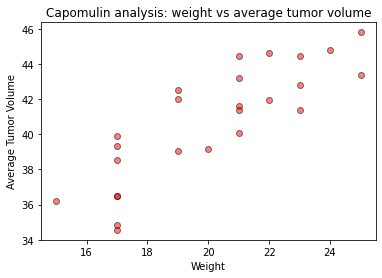

In [132]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
group_mouse = capomulin.groupby(["Mouse ID"]).agg(mouse_weight=('Weight (g)', np.mean), mouse_vol=('Tumor Volume (mm3)', np.mean))

fig3 = plt.figure()

plt.scatter(group_mouse["mouse_weight"], group_mouse["mouse_vol"], marker='o', facecolors="red", edgecolors="black", alpha=0.5)
plt.title("Capomulin analysis: weight vs average tumor volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [129]:
group_mouse.head()

,mouse_weight,mouse_vol
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


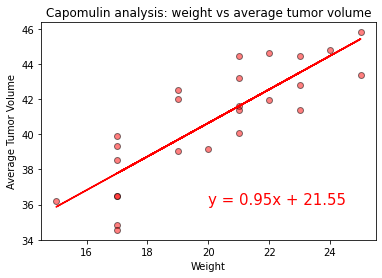

The correlation is 0.84


In [139]:
x_values = group_mouse["mouse_weight"]
y_values = group_mouse["mouse_vol"]



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#y=mx+b
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig4 = plt.figure()

plt.scatter(x_values, y_values, marker='o', facecolors="red", edgecolors="black", alpha=0.5)

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title("Capomulin analysis: weight vs average tumor volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")

plt.show()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")